In [34]:
import sys
sys.path.append('../')
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from PIL import Image
import seaborn as sns
from sfp_nsdsyn import prep, stim   

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Figure 1a 
In order to plot the figure 1a, you need to have natural-scenes-dataset/nsddata/stimuli/nsdsynthetic/nsdsynthetic downloaded. The w_a and w_r information will be downloaded using prep.load_stim_info_as_df()

In [24]:
rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'axes.linewidth': 1,
      'axes.labelpad': 6,
      'xtick.major.pad': 10,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'lines.linewidth': 1,
      'font.size': 12,
      'axes.titlesize': 12,
      'axes.titleweight': 'bold',
      'axes.labelsize': 12,
      'xtick.labelsize': 10,
      'ytick.labelsize': 10,
      'legend.title_fontsize': 11,
      'legend.fontsize': 11,
      'figure.titlesize': 11,
      'figure.dpi': 72 * 3,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)

In [ ]:
## remove this part when you run the notebook
import json
config = json.load(open('../config.json'))
##
## edit the paths below for your configurations
NSD_path = config['NSD_DIR']
nsd_stim_info_path = config['NSD_DIR']
##
stim_info_df = pd.read_csv(os.path.join(nsd_stim_info_path, 'nsdsyn_stim_description.csv'))


,image_idx,stim_idx,w_r,w_a,phase,class_idx,phase_idx,names,freq_lvl
0,105,0,0.0,-6.0,0.000000,0,0,pinwheel,0
1,106,1,0.0,-6.0,1.570796,0,2,pinwheel,0
2,107,2,0.0,-6.0,3.141593,0,4,pinwheel,0
3,108,3,0.0,-6.0,4.712389,0,6,pinwheel,0
4,109,4,0.0,-11.0,0.000000,1,0,pinwheel,1


In [18]:
im_numbers = [105, 113, 129, 137, 153, 161, 177, 185]
img_to_draw = stim_info_df.query('image_idx in @im_numbers').sort_values('freq_lvl')
img_to_draw

,image_idx,stim_idx,w_r,w_a,phase,class_idx,phase_idx,names,freq_lvl
0,105,0,0.0,-6.0,0.0,0,0,pinwheel,0
24,129,24,4.0,-4.0,0.0,6,0,forward spiral,0
48,153,48,6.0,-0.0,0.0,12,0,annulus,0
72,177,72,4.0,4.0,0.0,18,0,reverse spiral,0
8,113,8,0.0,-20.0,0.0,2,0,pinwheel,2
32,137,32,14.0,-14.0,0.0,8,0,forward spiral,2
56,161,56,20.0,-0.0,0.0,14,0,annulus,2
80,185,80,14.0,14.0,0.0,20,0,reverse spiral,2


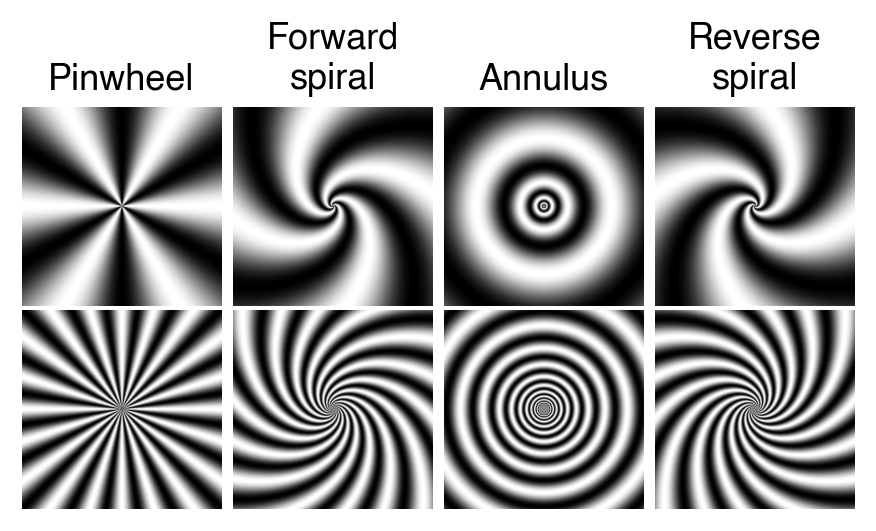

In [26]:
width, height = (1360, 714) #image size presented in the NSD synthetic experiment 
# Calculate the coordinates for the center crop because the scaled gratings were a square at the center of the screen
left = (width - 714) // 2
top = (height - 714) // 2
right = left + 714
bottom = top + 714

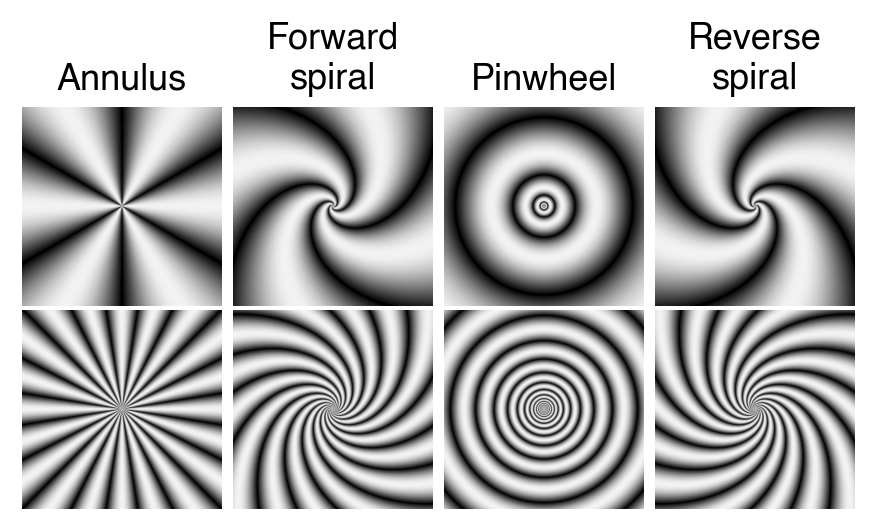

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(5,2.47))
names = ['Annulus', 'Forward\nspiral', 'Pinwheel', 'Reverse\nspiral']
for i in range(4): 
    axes[0,i].set_title(f'{names[i]}')
    for kk, k in enumerate([0,2]):
        pic = os.path.join(config['NSD_DIR'],'nsddata/stimuli/nsdsynthetic/nsdsynthetic', f'nsdsynthetic{105+k*4+i*24}.png')
        img = Image.open(pic).convert('L')        
        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))
        axes[kk,i].imshow(img_cropped, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        axes[kk,i].axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)


# Figure 1b  
Figure 1b. This figure was created in Illustrator using `nsdsynthetic133.png` under  
`natural-scenes-dataset/nsddata/stimuli/nsdsynthetic/nsdsynthetic/`  
and one of the forward spiral images from Broderick et al., presented in their VSS poster  
(https://archive.org/details/broderick-2018-mapping-spatial).

# Figure 1c

In [ ]:
stim_info = stim_info_df.drop_duplicates(subset=['class_idx'])
bd_stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/Broderick_dataset/broderick_stim_description_corrected.csv')
bd_stim_info = bd_stim_info.drop_duplicates(subset=['class_idx'])

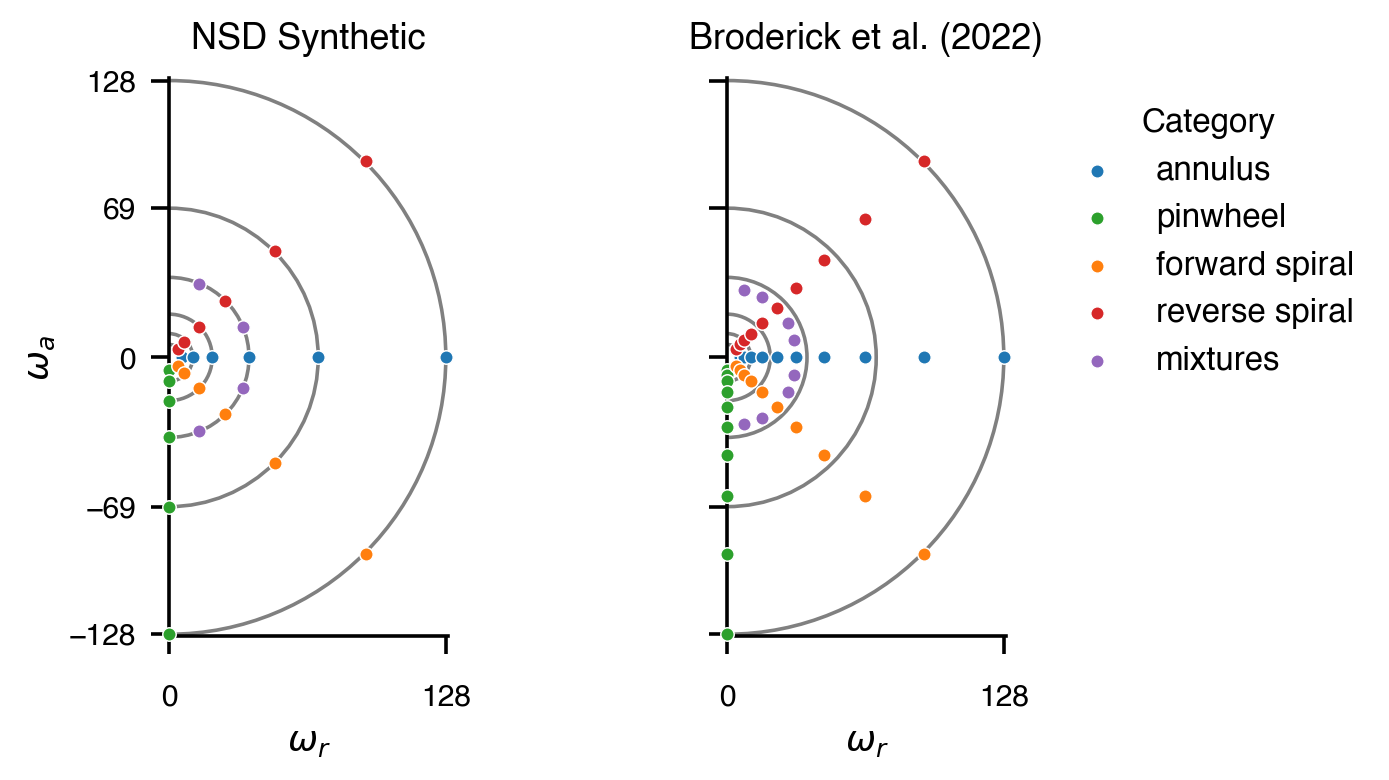

In [ ]:
rc.update({'axes.linewidth': 1.2,
           'xtick.major.width': 1.2,
           'ytick.major.width': 1.2,
           'axes.labelpad': 4,
           'axes.titlepad': 10})
           
sns.set_theme(style="ticks", context='notebook', rc=rc, font_scale=1)
fig, axes = plt.subplots(1,2, sharey=True)
fig.set_size_inches(5, 5.5)
colors = [sns.color_palette('tab10', 10)[:][k] for k in [0,2,1,3,4]]
colors.append('gray')
for i, cat in enumerate(['annulus', 'pinwheel', 'forward spiral', 'reverse spiral', 'mixtures']):

    axes[0].scatter(stim_info.query(f'names == "{cat}"')['w_r'], 
                    stim_info.query(f'names == "{cat}"')['w_a'], label=cat, s=20, 
                    color=colors[i], edgecolors='w', linewidths=0.5, zorder=100, clip_on=False)
    axes[1].scatter(bd_stim_info.query(f'names == "{cat}"')['w_r'], 
                    bd_stim_info.query(f'names == "{cat}"')['w_a'], label=cat, s=20, 
                    color=colors[i], edgecolors='w', linewidths=0.5, zorder=100, clip_on=False)

radius_list = [6,11,20,37,69,128]  # Radius of the ring


for ax in axes:
    for radi in radius_list:
        circle1 = plt.Circle((0, 0), radi, linewidth=1.2, color='grey', clip_on=True, fill=False)
        ax.add_patch(circle1)    
    ax.set(xlim=(0, 129), ylim=(-129, 129), yticks=[-128,-69,0,69,128], xticks=[0, 128])
    #ax.legend(bbox_to_anchor=(1.1, 0.9), frameon=False, title='Category')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_aspect('equal')
    ax.set_xlabel(r"$\omega_r$")

fig.subplots_adjust(wspace=1)
axes[0].set_ylabel(r"$\omega_a$")
axes[1].set_ylabel('')
axes[0].set_title('NSD Synthetic')
axes[1].set_title('Broderick et al. (2022)')
axes[1].legend(bbox_to_anchor=(1.1, 1), frameon=False, title='Category')


In [ ]:
# create images using w_a and w_r and phi
# Create a numpy array to hold the generated images
stims = np.zeros((len(img_to_draw), 512, 512))
for i, row in enumerate(img_to_draw.itertuples()):
    stims[i] = stim.make_img(row.w_r, row.w_a, row.phase, imsize=512)

fig, axes = plt.subplots(2, 4, figsize=(5,2.47))
names = ['Pinwheel', 'Forward\nspiral', 'Annulus', 'Reverse\nspiral']
for i in range(4): 
    axes[0,i].set_title(f'{names[i]}')

for i, ax in enumerate(axes.flatten()):
    ax.imshow(stims[i,:,:], cmap='gray', vmin=-1, vmax=1)
    ax.axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)
